# Multi class case

## Naive idea (one-vs-all)
Assume that there are $N$ classes. The naive idea is to decompose this $N$-class classification problem into $N$ binary classification problems. The model will contains $N$ classifiers. The $i$th classifer is used to classify whehter the given features has the label `i` or not.

For example, asusme we are dealing with the `iris` dataset. There are 3 classes. By the naive idea, we will modify the labels into `Setosa` and `not Setosa`, and use it to train the first classifier. Similarly we can have two more classifiers to tell `Versicolour`/`not Versicolour` and `Virginica`/`not Virginica`. Then we combine all three classifiers to get a final classifier to put the data into one of the three classes.


## `Softmax` function
A better method is mimic the sigmoid function. Recall that in binary classification problem, after 

$$
z=L(x)=\theta_0+\sum_{i=1}^n\theta_ix_i,
$$
the sigmoid function is applied $p=\sigma(z)$. This $p$ is interepreted as the probability for the data belonging to class $1$. For $N$-class problem, we could generalize the sigmoid function to `softmax` function, whose value is a $N$-dimensional vector $p=[p_k]_{i=1}^N$. Here $p_k$ represents the probability for the data belonging to class $k$. Then after we get the vector $p$, we then find the highest probability and that indicates the class of the data point.

The `softmax` function is defined in the following way:

$$
p_k=\sigma(z)=\dfrac{\exp(z_k)}{\sum_{i=1}^N\exp(z_i)},\quad \text{ for }z=[z_1, z_2,\ldots,z_N].
$$
In the model, each $z_i=L_i(x)=\theta^{(i)}_0+\sum_{i=1}^n\theta^{(i)}_ix_i,$ has its own weights. 

The related cost function is also updated:

$$
J(\Theta)=-\sum_{i=1}^Ny_k\ln(p_i).
$$
Therefore the same gradient descent algorithm can be applied.



````{note}
Note that `sigmoid` function and the `binary crossentropy` cost functions are the special case of `softmax` function.
````


````{note}
The labels are not recorded as labels, but as vectors. This is called dummy variables, or one-hot encodings.
````



## Codes
- Both `LogisticRegression()` and `SGDClassifier()` by default uses the one-vs-all naive idea. 
- Using `kears`, `softmax` can be implemented. The key configuration is the loss function `loss='categorical_crossentropy'` and the activation function `softmax`. Note that in this case the labels should be translated into one-hot vectors.

We use `make_classification` as an example. To save time we won't carefully tune the hyperparameters here.

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=10, n_informative=2, n_redundant=2, n_repeated=2, n_classes=3, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

Although there are totally 10 features, the dataset can be visualized using the informative features. By description, the informative features are the first two.

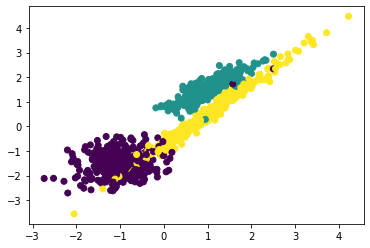

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

In [3]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.94

In [4]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.84

To apply `keras` package, we should first change `y` into one-hot vectors. Here we use the function provided by `keras`.

In [5]:
from tensorflow.keras.utils import to_categorical
vy_train = to_categorical(y_train, num_classes=3)
vy_test = to_categorical(y_test, num_classes=3)

In [6]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(3, activation='softmax', input_dim=10))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, vy_train, epochs=50, batch_size=50, verbose=0)
_ = model.evaluate(X_test, vy_test)

1/5 [=====>........................] - ETA: 0s - loss: 0.3448 - accuracy: 0.9062

5/5 [==============================] - 0s 1ms/step - loss: 0.3592 - accuracy: 0.8933
